# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [134]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [135]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [136]:
# Load the dataset
employee_data = pd.read_csv(r"Employee_data.csv")

In [137]:
# Check the first few entries
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [138]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [139]:
# Inspect the different columns in the dataset
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [140]:
# Check the summary of the dataset
employee_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [141]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [142]:
# Check the number of missing values in each column
employee_data.isna().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [143]:
# Check the percentage of missing values in each column
round(((employee_data.isna().sum()/ len(employee_data.index)) * 100),2)

Employee ID                   0.00
Age                           0.00
Gender                        0.00
Years at Company              0.00
Job Role                      0.00
Monthly Income                0.00
Work-Life Balance             0.00
Job Satisfaction              0.00
Performance Rating            0.00
Number of Promotions          0.00
Overtime                      0.00
Distance from Home            2.56
Education Level               0.00
Marital Status                0.00
Number of Dependents          0.00
Job Level                     0.00
Company Size                  0.00
Company Tenure (In Months)    3.23
Remote Work                   0.00
Leadership Opportunities      0.00
Innovation Opportunities      0.00
Company Reputation            0.00
Employee Recognition          0.00
Attrition                     0.00
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [144]:
# Handle the missing value rows in the column
# Drop rows where Distance from Home or Company Tenure (In Months) is NA

original_count = len(employee_data)
employee_data = employee_data.dropna(subset=['Distance from Home', 'Company Tenure (In Months)'])

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [145]:
# Check the percentage of remaining data after missing values are removed
remaining_count = len(employee_data)
percentage_remaining = (remaining_count / original_count) * 100
print(f"Remaining data after dropping missing values: {percentage_remaining:.2f}%")


Remaining data after dropping missing values: 94.67%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [146]:
columns = employee_data.select_dtypes(['object']).columns

for column in columns:
    print(employee_data[column].value_counts())

Gender
Male      38700
Female    31935
Name: count, dtype: int64
Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64
Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64
Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64
Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: count, dtype: int64
Overtime
No     47588
Yes    23047
Name: count, dtype: int64
Education Level
Bachelors Degree    21169
Associate Degree    17677
Masters Degree      14303
High School         13877
PhD                  3609
Name: count, dtype: int64
Marital Status
Married     35516
Single      24869
Divorced    10250
Name: count, dtype: int64
Job Level
Entry     28199
Mid       28145
Senior    14291
Name: count, dtype: int64
Company Size

In [147]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def categorical_columns(df):
    columns = df.select_dtypes(['object']).columns
    
    for column in columns:
        print(f"Column : {column}")
        
        #Get the unique value
        unique_values = df[column].unique()
        print(unique_values)

        #Checking for the redundant columns
        normalized = df[column].astype(str).str.lower()
        redundant = normalized.value_counts()

        if len(redundant) != len(unique_values):
            print("Potential redundant values detected (case/spacing differences):")
            print(redundant)
        else:
            print("No redundant values found.")

In [148]:
# Check the data
categorical_columns(employee_data)

Column : Gender
['Male' 'Female']
No redundant values found.
Column : Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
No redundant values found.
Column : Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']
No redundant values found.
Column : Job Satisfaction
['Medium' 'High' 'Very High' 'Low']
No redundant values found.
Column : Performance Rating
['Average' 'Low' 'High' 'Below Average']
No redundant values found.
Column : Overtime
['No' 'Yes']
No redundant values found.
Column : Education Level
['Associate Degree' 'Masters Degree' 'Bachelors Degree' 'High School'
 'PhD']
No redundant values found.
Column : Marital Status
['Married' 'Divorced' 'Single']
No redundant values found.
Column : Job Level
['Mid' 'Senior' 'Entry']
No redundant values found.
Column : Company Size
['Medium' 'Small' 'Large']
No redundant values found.
Column : Remote Work
['No' 'Yes']
No redundant values found.
Column : Leadership Opportunities
['No' 'Yes']
No redundant values found.
Column : 

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [149]:
# Drop redundant columns which are not required for modelling
employee_data.drop(['Employee ID', 'Company Tenure (In Months)',], axis=1, inplace=True)

In [150]:
# Check first few rows of data
employee_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,Married,0,Mid,Medium,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,Divorced,3,Mid,Medium,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,Married,3,Mid,Medium,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,Single,2,Mid,Small,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,Divorced,0,Senior,Medium,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [151]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [152]:
# Put all the feature variables in X
X = employee_data.drop(['Attrition'] , axis= 1)

# Put the target variable in y
Y = employee_data["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [153]:
# Split the data into 70% train data and 30% validation data
X_Train, X_Test, Y_Train, Y_Test = train_test_split( X , Y, train_size=0.7, test_size=0.3, random_state=100)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [154]:
# Select numerical columns
numeric_columns = X_Train.select_dtypes(['int64' , 'float64']).columns

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

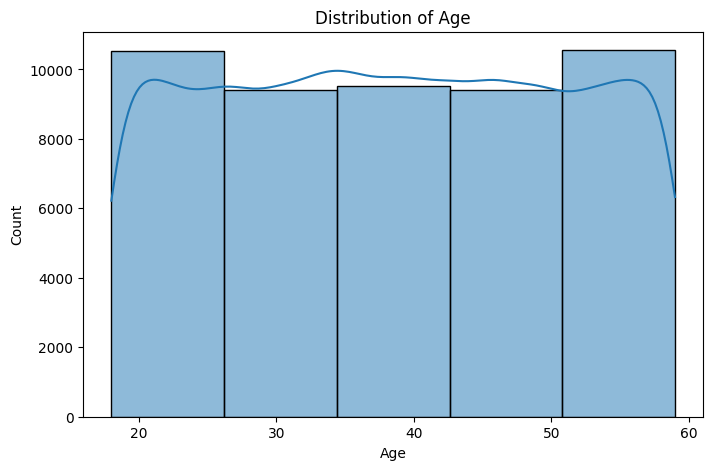

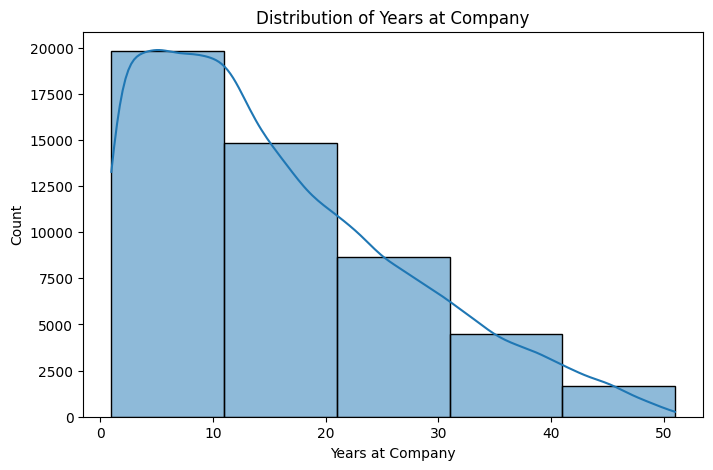

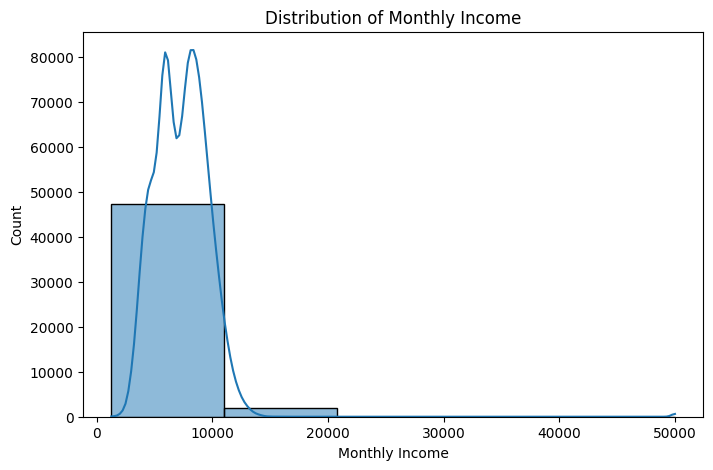

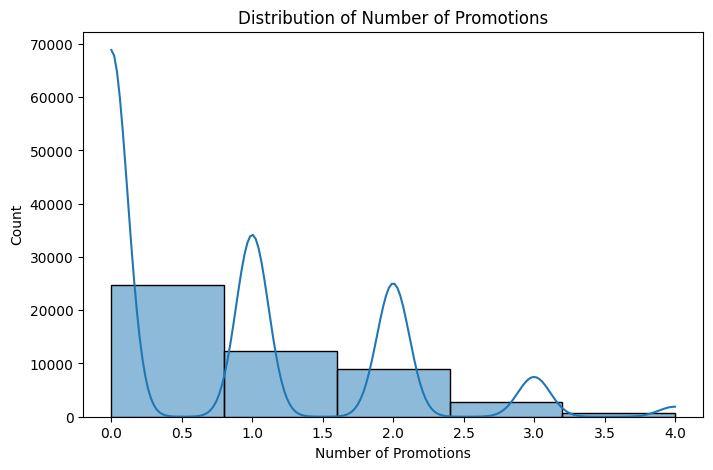

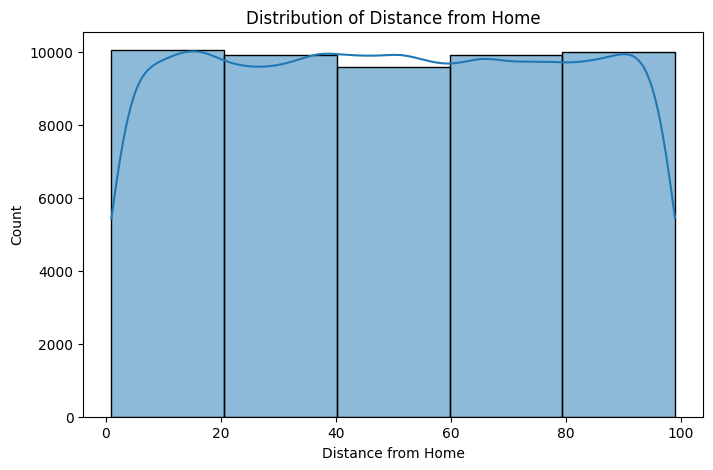

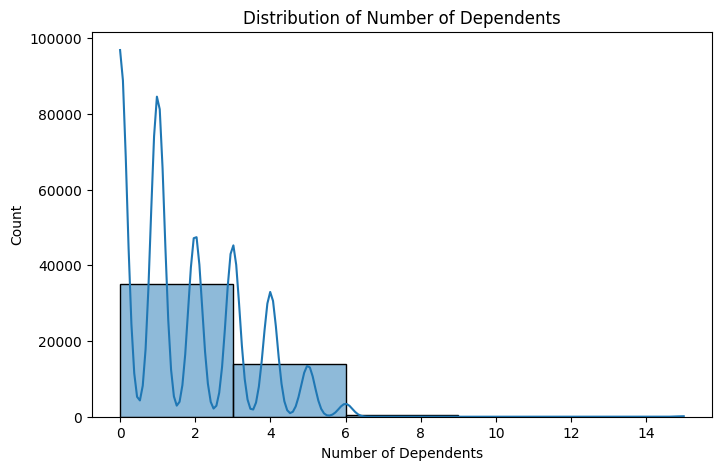

In [155]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = X_Train[numeric_columns]

for column in numeric_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df_numeric, x= column, kde=True, bins = 5)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

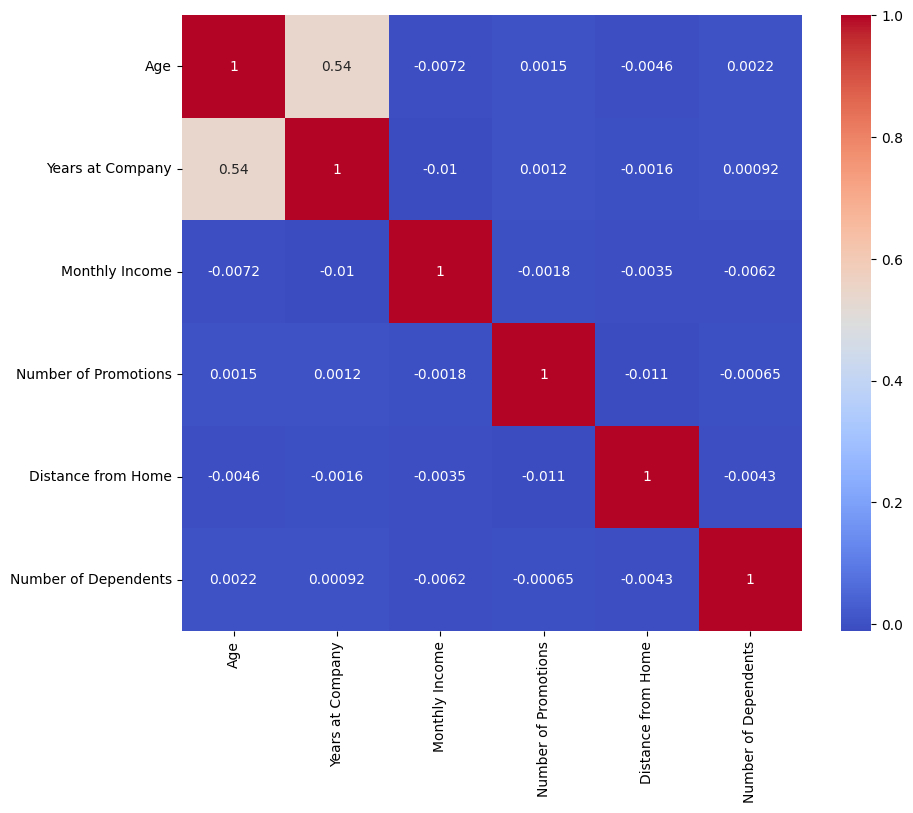

In [156]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr() , annot=True , cmap='coolwarm')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

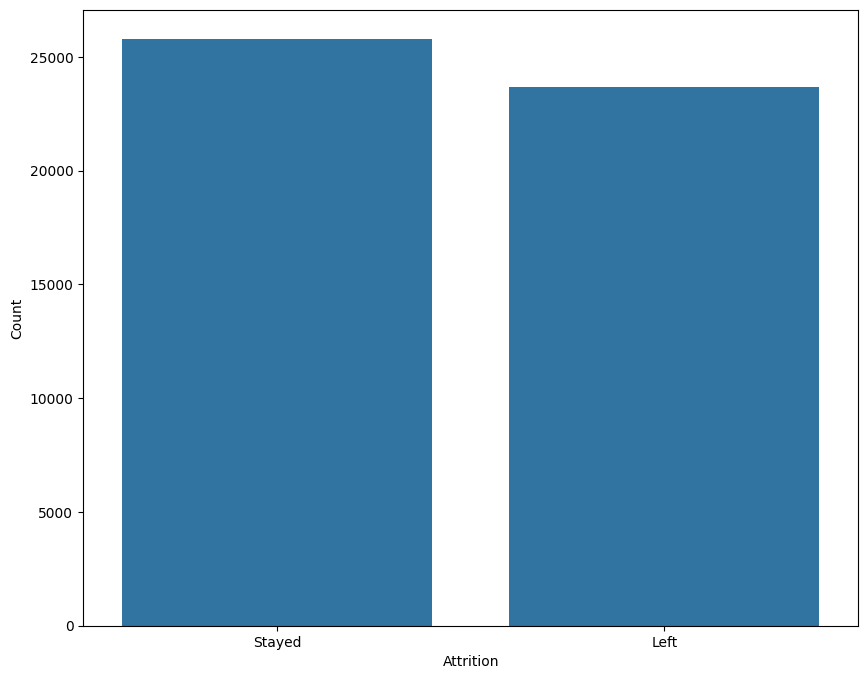

Attrition
Stayed    0.521418
Left      0.478582
Name: proportion, dtype: float64

In [157]:
# Plot a bar chart to check class balance
plt.figure(figsize=(10,8))
sns.countplot(x=Y_Train)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

# For training set
Y_Train.value_counts(normalize=True)


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

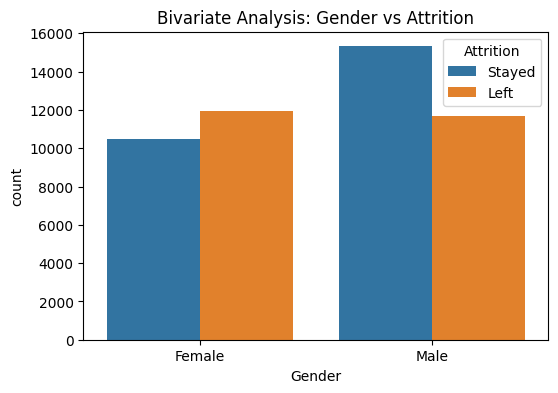

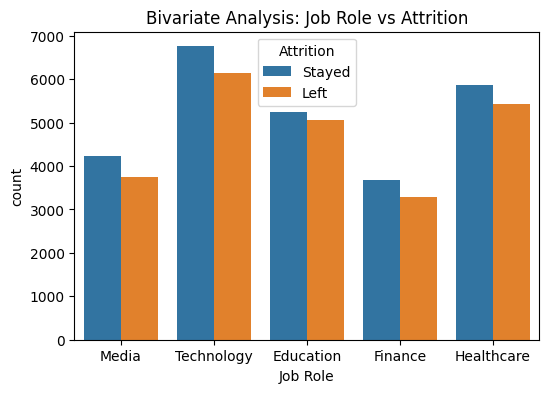

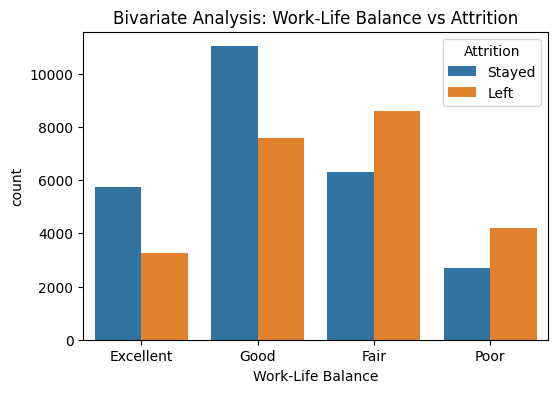

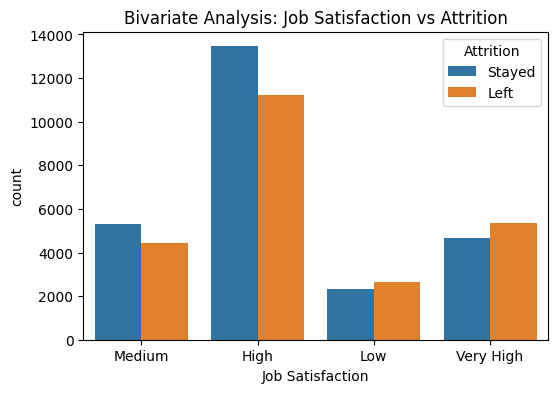

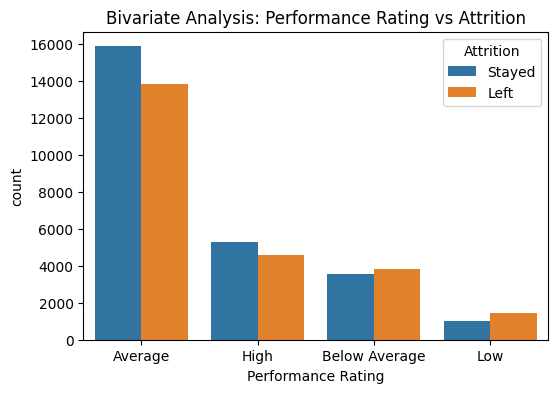

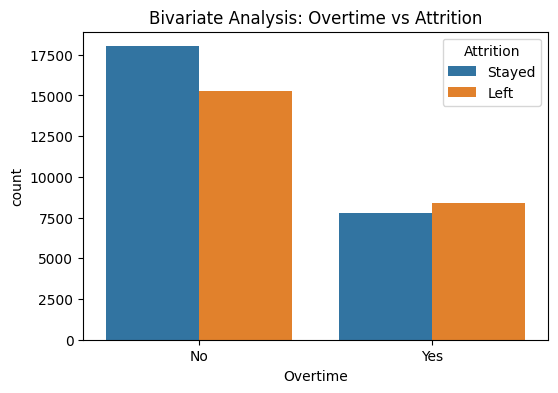

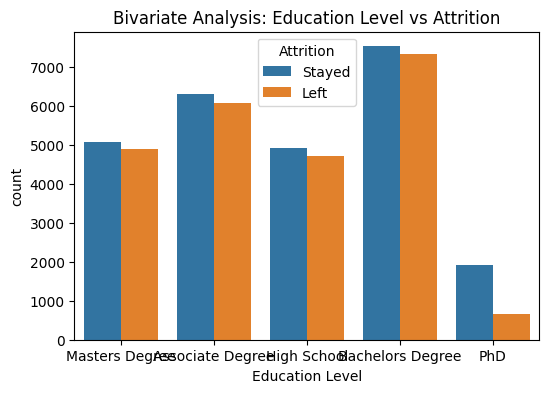

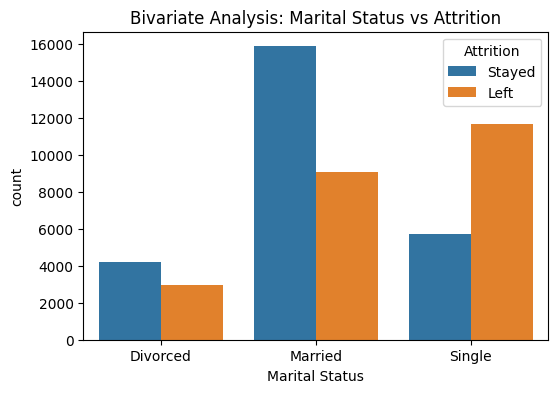

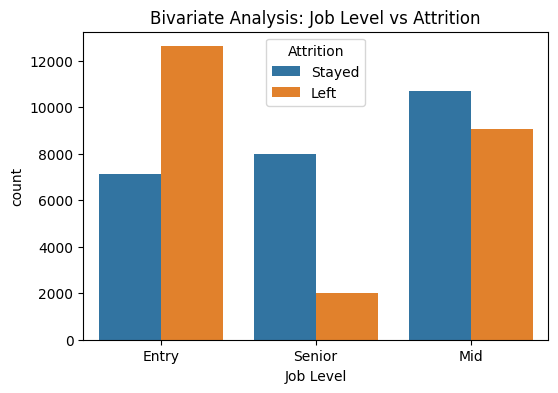

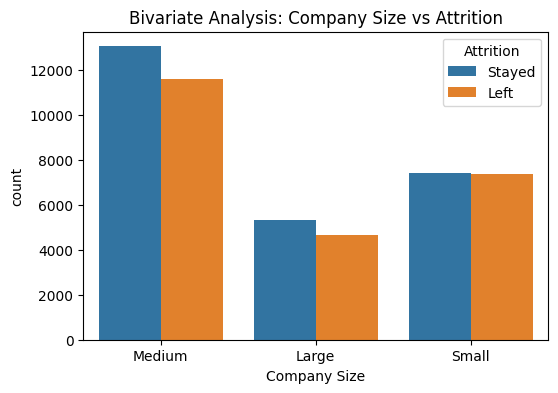

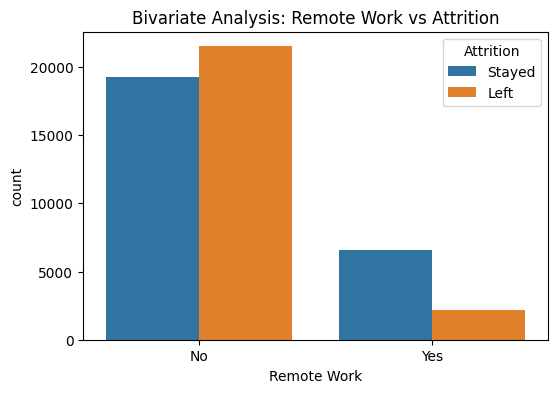

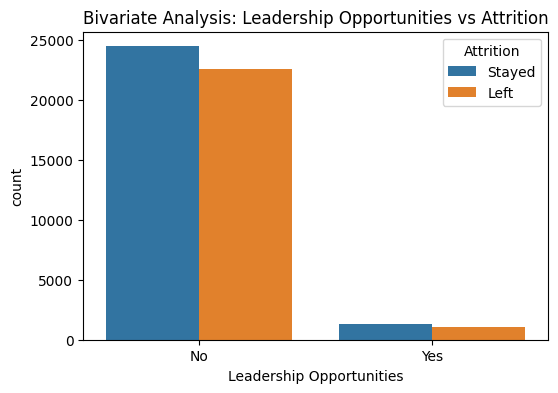

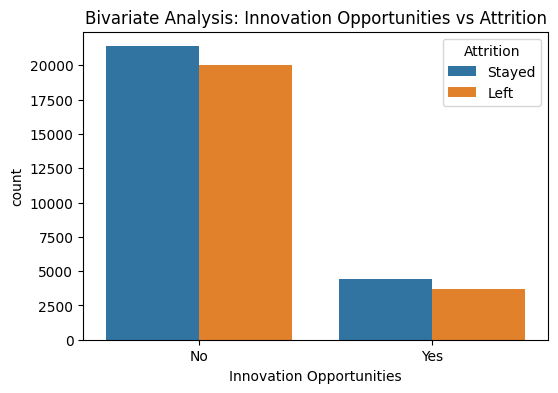

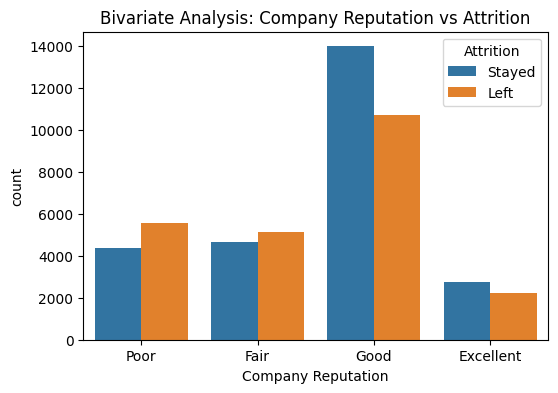

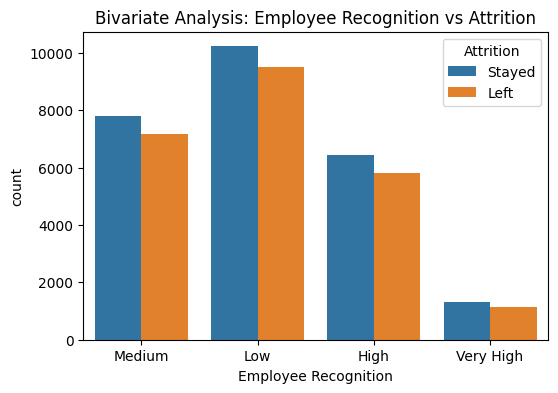

In [158]:
# Plot distribution for each categorical column with target variable
categorical_columns = X_Train.select_dtypes(['object']).columns
X_Train_Cat = X_Train[categorical_columns]

for column in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=column, hue=Y_Train, data=X_Train_Cat)
    plt.title(f"Bivariate Analysis: {column} vs Attrition")
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [159]:
# Select numerical columns
numeric_columns = X_Train.select_dtypes(['float64' , 'int64']).columns

5.1.2 Plot distribution of numerical columns

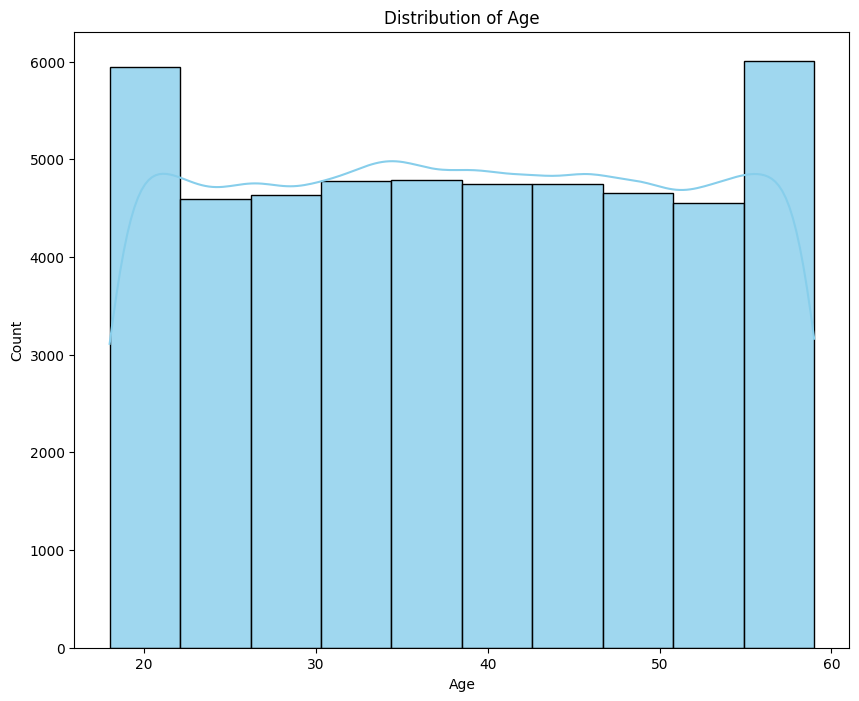

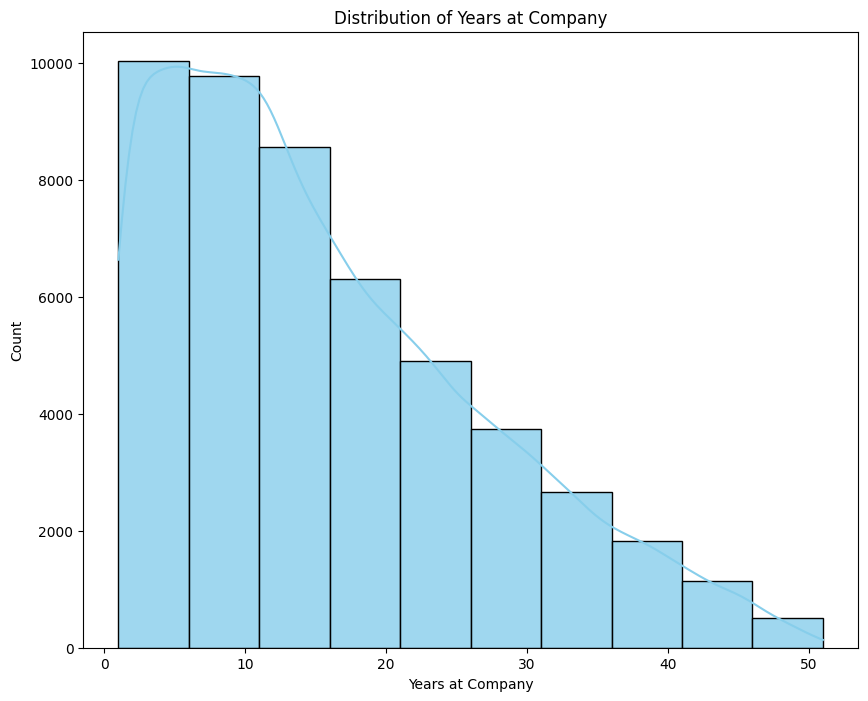

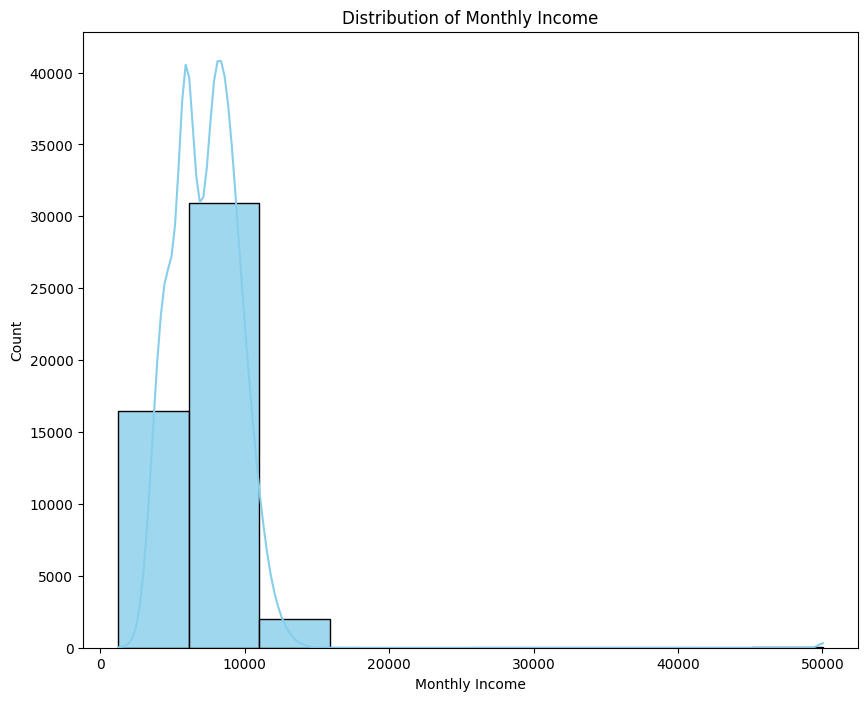

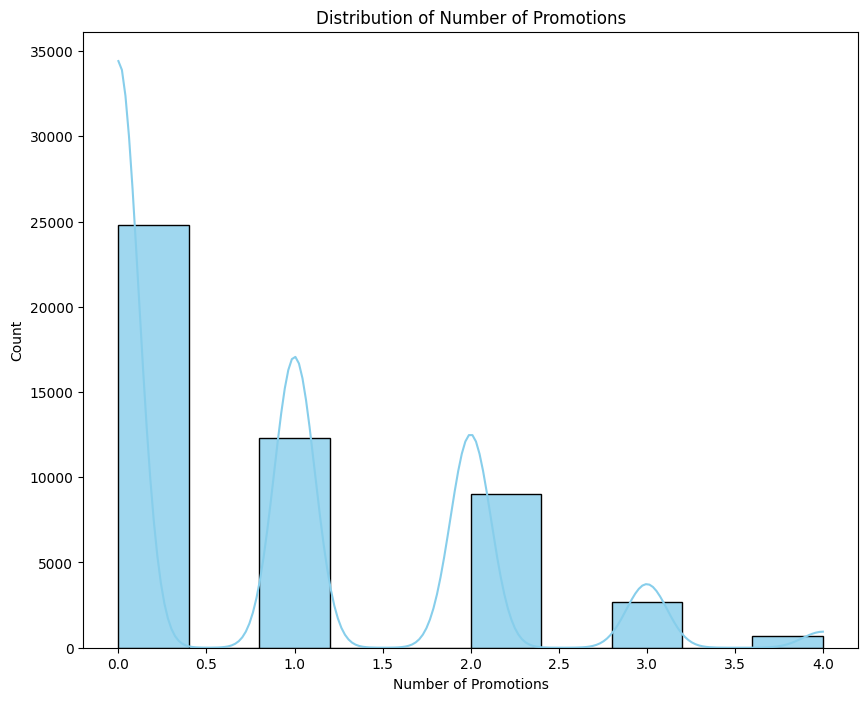

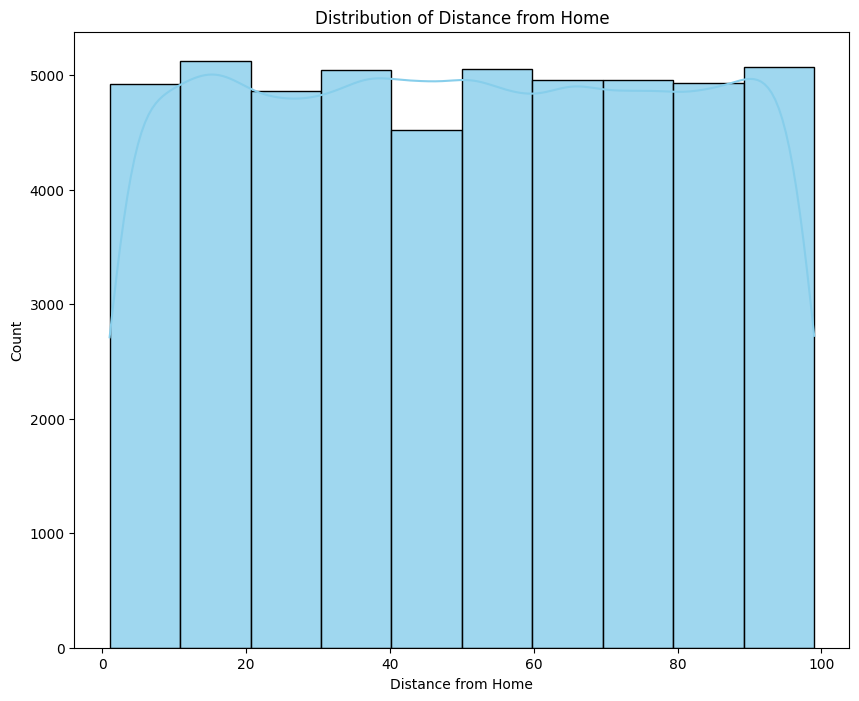

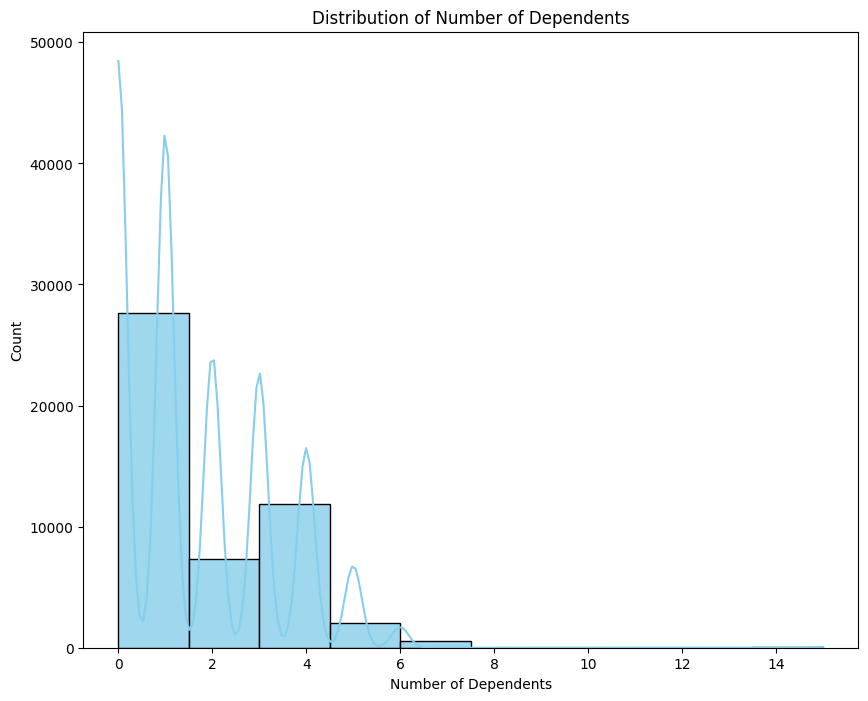

In [160]:
# Plot all the numerical columns to understand their distribution

for column in numeric_columns:
    plt.figure(figsize=(10,8))
    sns.histplot( data = X_Train, x=column , kde=True , bins=10 , color='skyblue', edgecolor='black', alpha=0.8)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

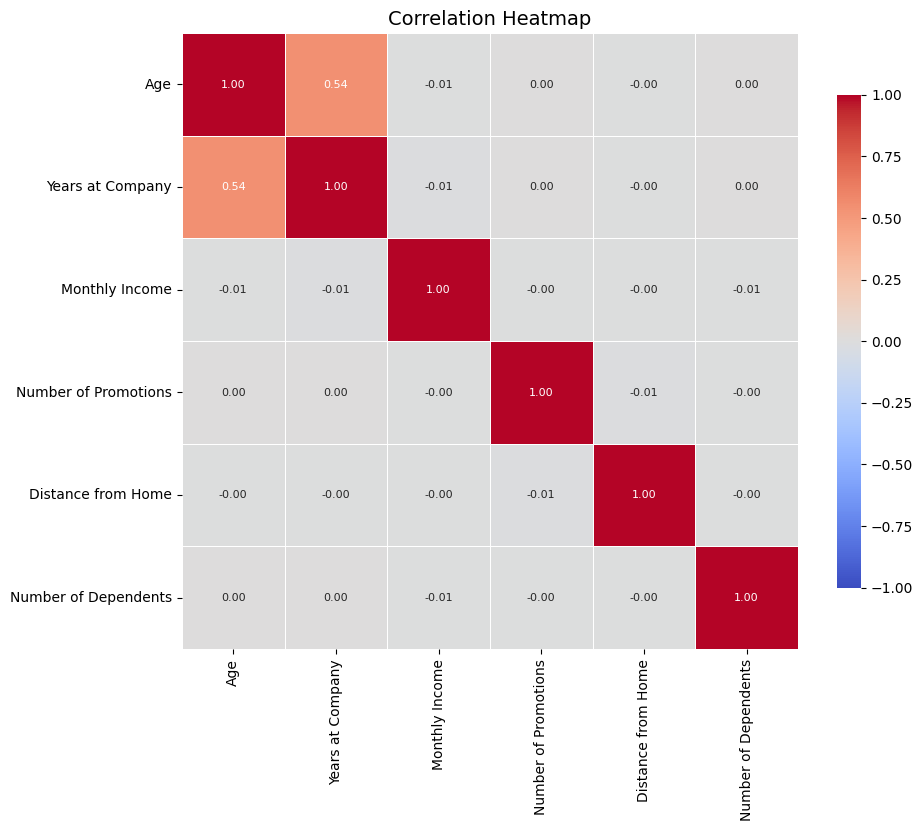

In [161]:
# Create correlation matrix for numerical columns
cor = X_Train[numeric_columns].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(
    data=cor, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    linecolor="white", 
    cbar=True, 
    cbar_kws={'shrink':0.8}, 
    center=0, 
    vmin=-1, vmax=1, 
    square=True, 
    annot_kws={"size":8}
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

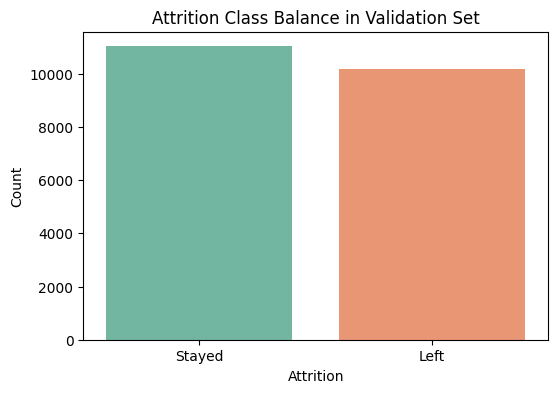

In [162]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6,4))
sns.countplot(x=Y_Test, palette="Set2")

plt.title("Attrition Class Balance in Validation Set")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

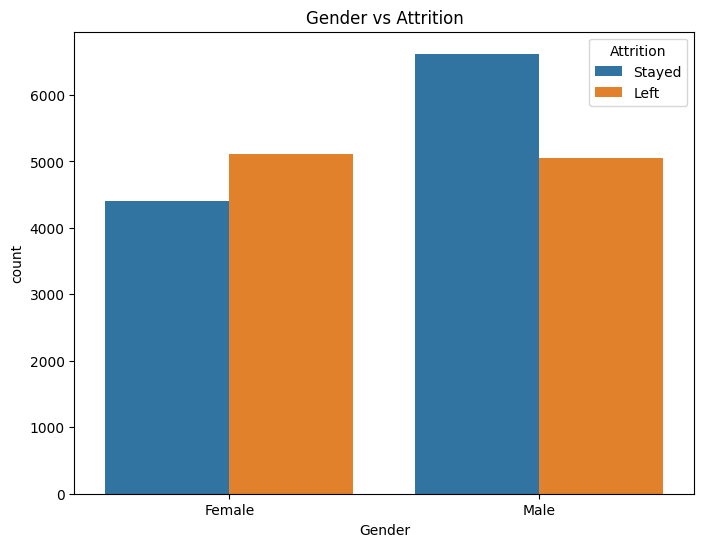

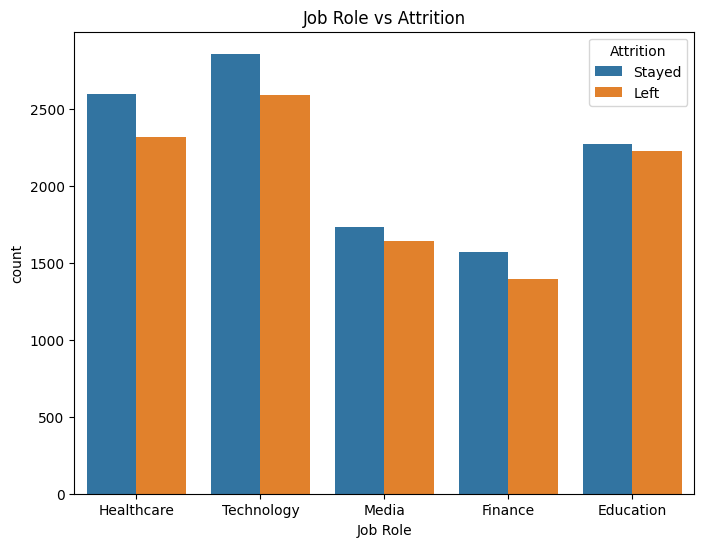

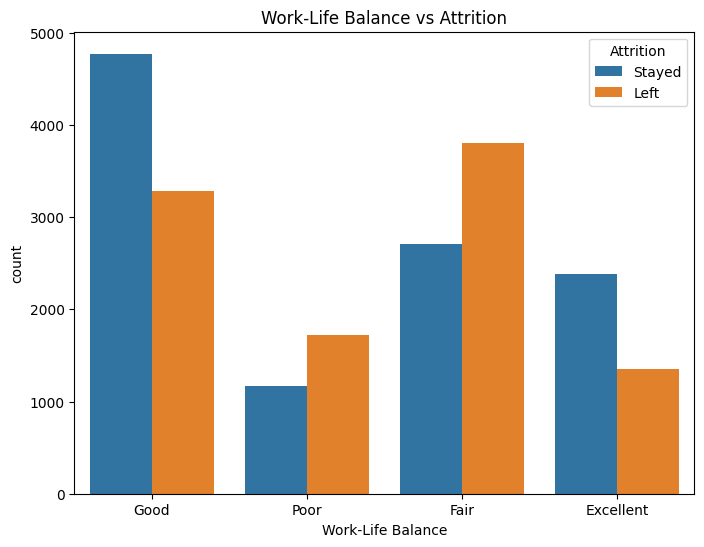

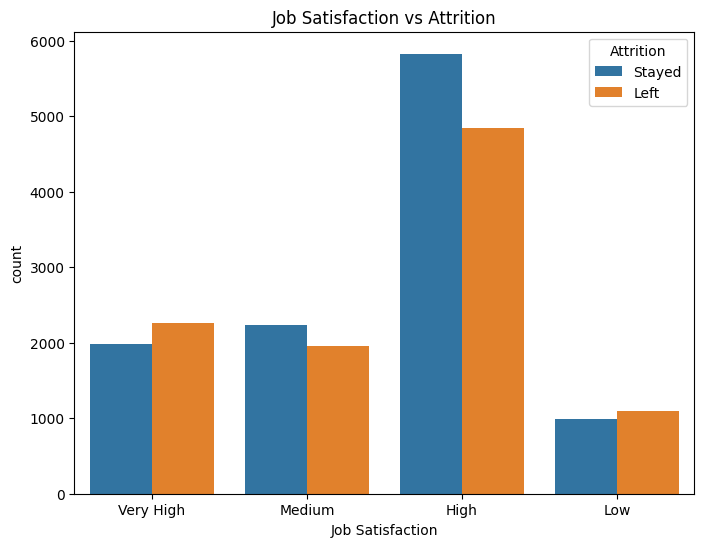

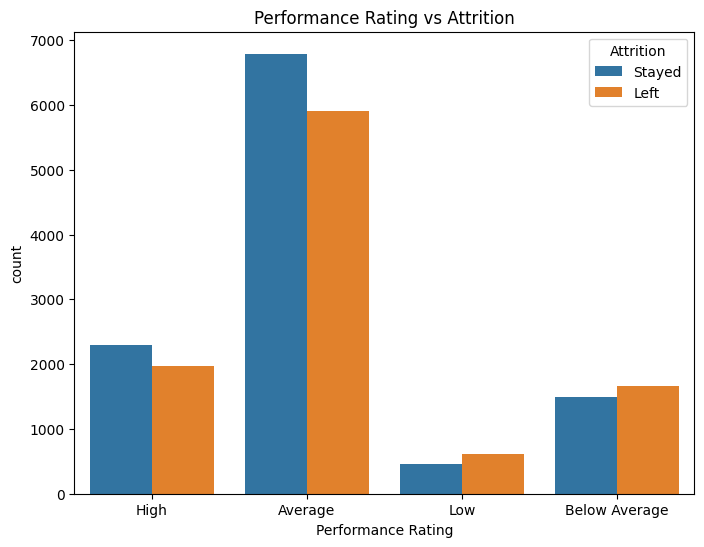

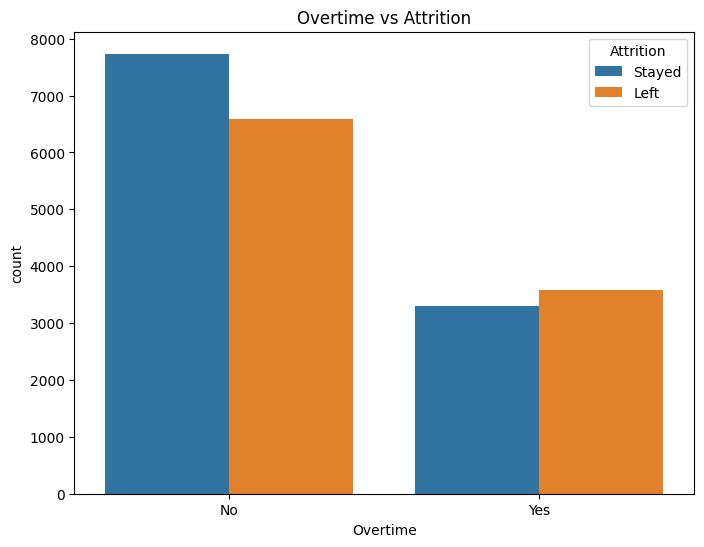

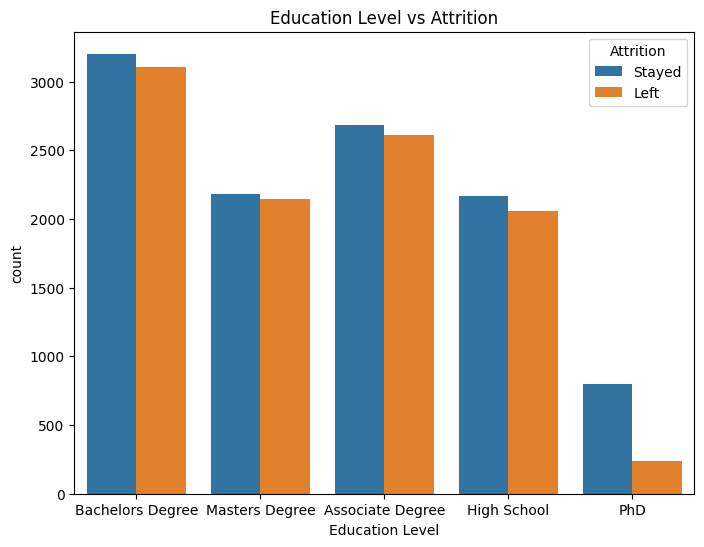

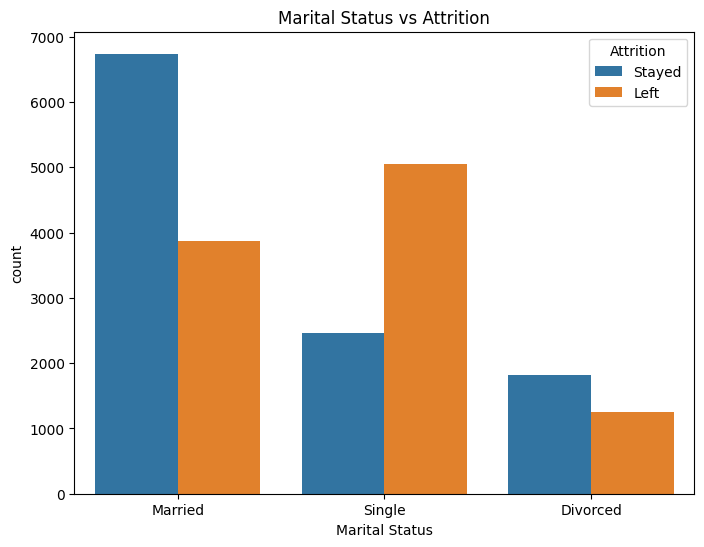

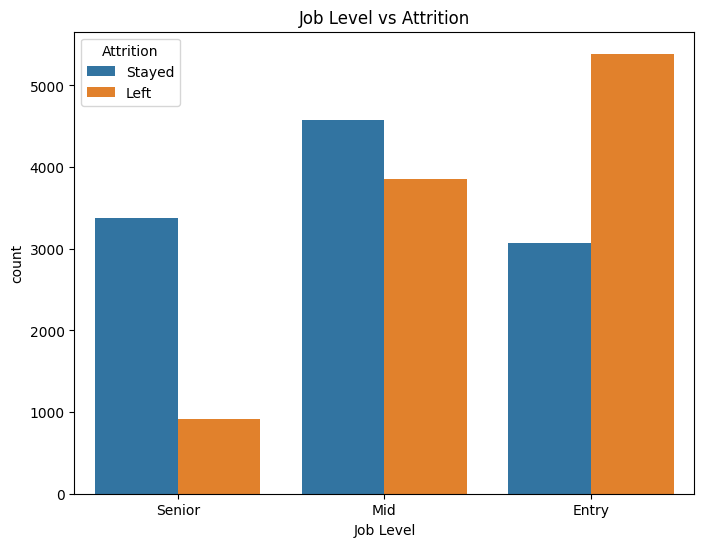

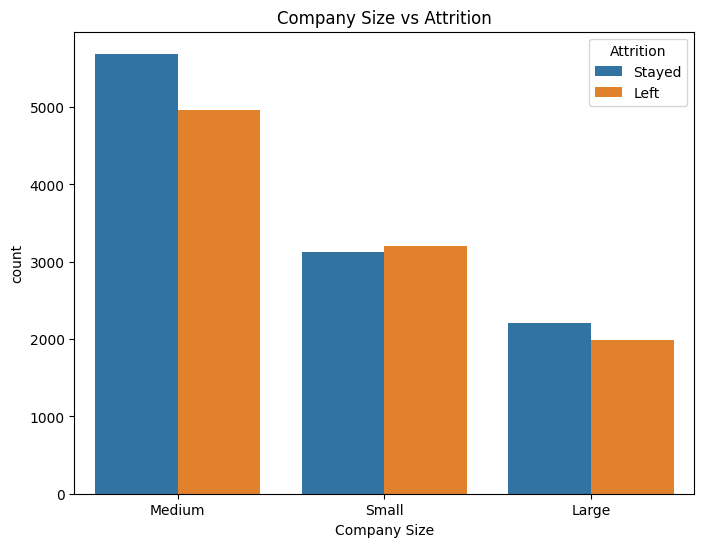

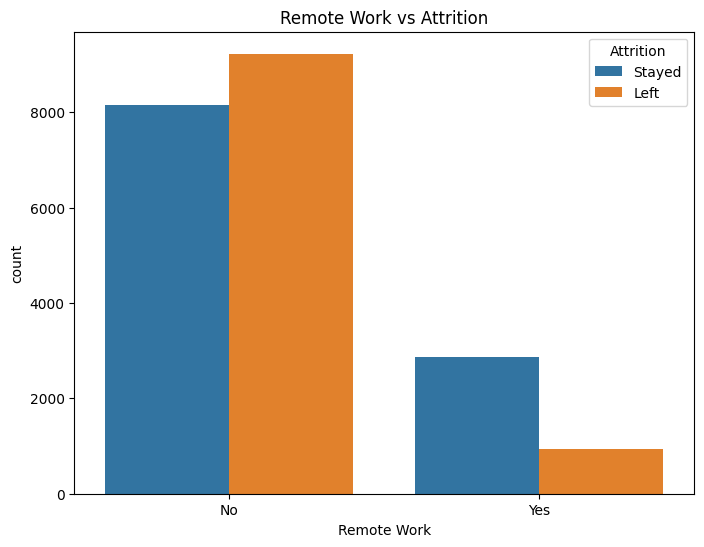

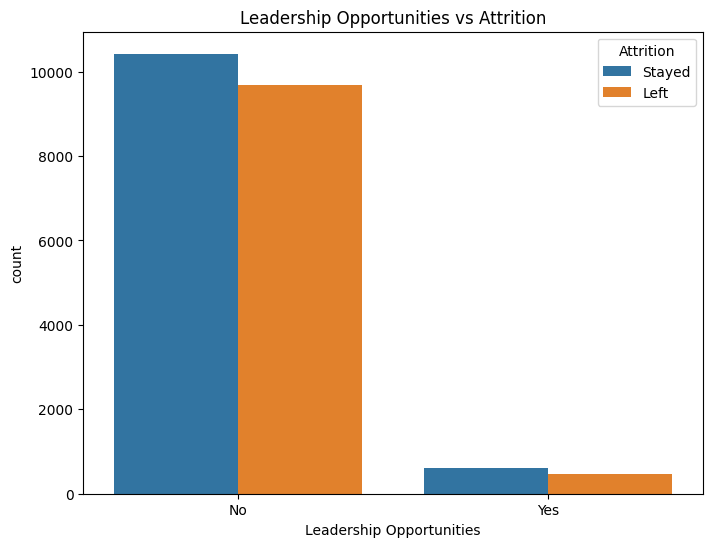

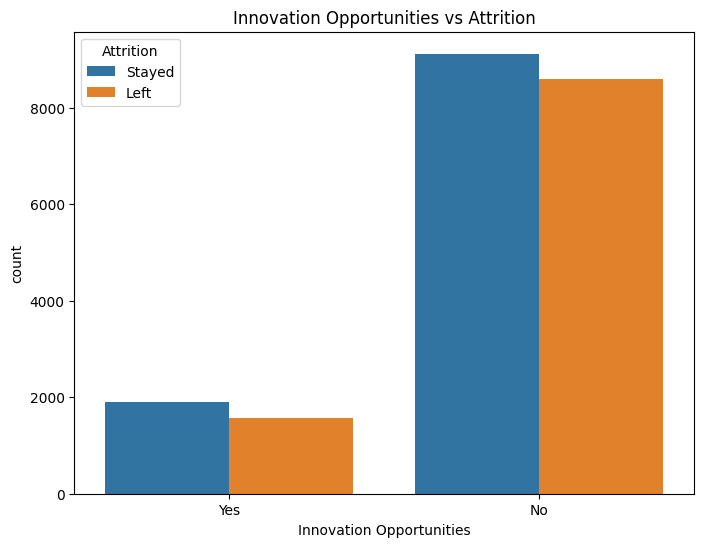

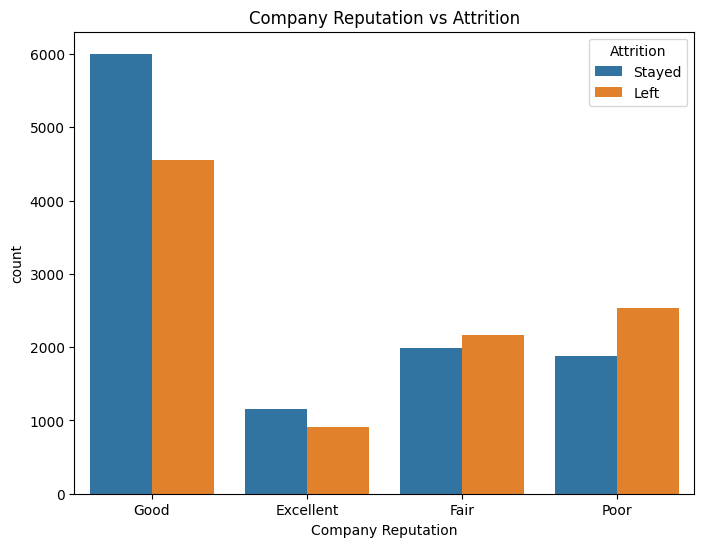

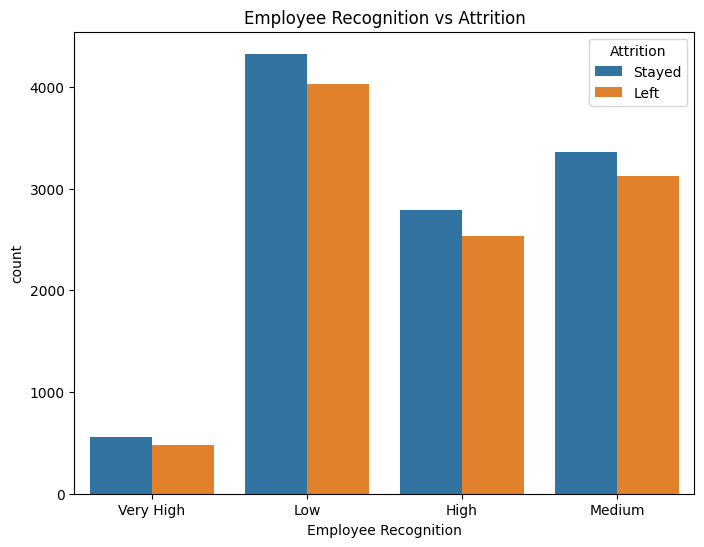

In [163]:
# Plot distribution for each categorical column with target variable
for column in X_Train.select_dtypes(['object']).columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=column, hue=Y_Test, data=X_Test)
    plt.title(f"{column} vs Attrition")
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [164]:
# Check the categorical columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [165]:
# Create dummy variables using the 'get_dummies' for independent columns
X_Train_dummies = pd.get_dummies(X_Train[categorical_columns], drop_first=True)

# Add the results to the master DataFrame
X_Train = pd.concat([X_Train,X_Train_dummies], axis = 1)

Now, drop the original categorical columns and check the DataFrame

In [166]:
# Drop the original categorical columns and check the DataFrame
X_Train.drop(categorical_columns, axis=1, inplace=True)

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [167]:
# Create dummy variables using the 'get_dummies' for independent columns
X_Test_dummies = pd.get_dummies(X_Test[categorical_columns], drop_first=True)
# Add the results to the master DataFrame
X_Test = pd.concat([X_Test,X_Test_dummies], axis = 1)

Now, drop the original categorical columns and check the DataFrame

In [168]:
# Drop categorical columns and check the DataFrame
X_Test.drop(categorical_columns, axis=1, inplace=True)
X_Test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Job Role_Finance,Job Role_Healthcare,Job Role_Media,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
38726,22,5,8751,2,32.0,1,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True
24574,43,19,8585,2,38.0,4,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
21775,39,2,5462,1,40.0,1,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False
42700,30,11,7936,2,21.0,0,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
60433,49,37,5413,1,13.0,0,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [169]:
# Convert y_train and y_validation to DataFrame to create dummy variables
Y_Train = pd.DataFrame(Y_Train, columns=['Attrition'])
Y_Test = pd.DataFrame(Y_Test, columns =['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [170]:
# Create dummy variables using the 'get_dummies' for dependent column
Y_Train_dummies = pd.get_dummies( Y_Train['Attrition'], drop_first=True)
Y_Train = pd.concat([Y_Train, Y_Train_dummies], axis=1)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [171]:
# Create dummy variables using the 'get_dummies' for dependent column
Y_Test_dummies = pd.get_dummies( Y_Test['Attrition'], drop_first=True)
Y_Test = pd.concat([Y_Test, Y_Test_dummies], axis=1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [172]:
# Drop redundant columns from both train and validation
Y_Train.drop('Attrition', axis=1, inplace=True)
Y_Test.drop('Attrition', axis=1, inplace=True)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [173]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [174]:
# Scale the numeric features present in the training set
scaler = StandardScaler()
X_Train[numeric_columns] = scaler.fit_transform(X_Train[numeric_columns])

# Scale the numerical features present in the validation set
X_Test[numeric_columns] = scaler.fit_transform(X_Test[numeric_columns])


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [175]:
# Import 'LogisticRegression' and create a LogisticRegression object
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
 

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [176]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on training data
rfe = rfe.fit(X_Train, Y_Train)


In [177]:
# Display the features selected by RFE
print("Selected Features by RFE:")
print(X_Train.columns[rfe.support_])


Selected Features by RFE:
Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single',
       'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes',
       'Company Reputation_Fair', 'Company Reputation_Poor'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [178]:
# Put columns selected by RFE into variable 'col'
col = X_Train.columns[rfe.support_]


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [179]:
# Select only the columns selected by RFE
X_Train = X_Train[col]

In [180]:
# View the training data
X_Train.head()


,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Performance Rating_Below Average,Performance Rating_Low,Overtime_Yes,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
1516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3352,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
59196,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
71453,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
68890,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [181]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

X_Train = X_Train.copy()
for col in X_Train.select_dtypes(include='bool').columns:
    X_Train[col] = X_Train[col].astype(int)

X_Train = X_Train.apply(pd.to_numeric, errors='coerce')

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [182]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = sm.GLM(Y_Train,(sm.add_constant(X_Train)), family = sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Stayed   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25072.
Date:                Mon, 24 Nov 2025   Deviance:                       50143.
Time:                        21:47:57   Pearson chi2:                 4.64e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3095
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2356      0.028      8.336      0.000       0.180       0.291
Gender_Male                          0.5738      0.022     25.875      0.000       0.530       0.617
Work-Life Balance_Fair              -1.0572      0.025    -41.957      0.000      -1.107      -1.008
Work-Life Balance_Poor              -1.2489      0.034    -37.262      0.000      -1.315      -1.183
Job Satisfaction_Low                -0.4914      0.037    -13.282      0.000      -0.564      -0.419
Job Satisfaction_Very High          -0.4829      0.028    -17.462      0.000      -0.537      -0.429
Performance Rating_Below Average    -0.3079      0.031    -10.012      0.000      -0.368      -0.248
Performance Rating_Low              -0.5673      0.051    -11.058      0.000      -0.668      -0.467
Overtime_Yes                        -0.3286      0.023    -14.053      0.000      -0.374      -0.283
Education Level_PhD                  1.4826      0.055     27.084      0.000       1.375       1.590
Marital Status_Single               -1.6887      0.025    -68.644      0.000      -1.737      -1.640
Job Level_Mid                        0.9611      0.024     39.780      0.000       0.914       1.008
Job Level_Senior                     2.5326      0.035     73.125      0.000       2.465       2.600
Remote Work_Yes                      1.7154      0.032     53.379      0.000       1.652       1.778
Company Reputation_Fair             -0.5296      0.028    -18.633      0.000      -0.585      -0.474
Company Reputation_Poor             -0.7359      0.029    -25.758      0.000      -0.792      -0.680
====================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [183]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [184]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_Train.columns
vif['VIF'] = [variance_inflation_factor(X_Train.values, i) for i in range(X_Train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            Features   VIF
0                        Gender_Male  1.83
10                     Job Level_Mid  1.65
9              Marital Status_Single  1.42
1             Work-Life Balance_Fair  1.41
7                       Overtime_Yes  1.39
11                  Job Level_Senior  1.33
13           Company Reputation_Fair  1.26
14           Company Reputation_Poor  1.26
4         Job Satisfaction_Very High  1.23
2             Work-Life Balance_Poor  1.18
12                   Remote Work_Yes  1.18
5   Performance Rating_Below Average  1.15
3               Job Satisfaction_Low  1.12
6             Performance Rating_Low  1.05
8                Education Level_PhD  1.05


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [185]:
# Predict the probabilities on the training set
Y_Train_Pred = result.predict(sm.add_constant(X_Train))
Y_Train_Pred

1516     0.377470
3352     0.943345
59196    0.767937
71453    0.436563
68890    0.802680
           ...   
15937    0.438490
66958    0.691981
69203    0.965842
59485    0.799381
40956    0.940935
Length: 49444, dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [186]:
# Reshape it into an array

Y_Train_Pred_array = Y_Train_Pred.values.reshape(-1)
print(Y_Train_Pred_array)

[0.37746979 0.94334509 0.76793652 ... 0.96584221 0.79938063 0.94093492]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [187]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
Y_Train_array = Y_Train.values.ravel()              # flatten to 1D
Y_Train_Pred_array = Y_Train_Pred.values.ravel()    # flatten to 1D

y_train_pred_final = pd.DataFrame({
    'Stayed': Y_Train_array,
    'Stayed_Probability': Y_Train_Pred_array,
    'Employee ID': Y_Train.index
})

y_train_pred_final.head()


,Stayed,Stayed_Probability,Employee ID
0,True,0.377470,1516
1,True,0.943345,3352
2,False,0.767937,59196
3,False,0.436563,71453
4,False,0.802680,68890


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [188]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = (y_train_pred_final['Stayed_Probability'] >= 0.5).astype(int)
y_train_pred_final.head()


,Stayed,Stayed_Probability,Employee ID,Predicted
0,True,0.377470,1516,0
1,True,0.943345,3352,1
2,False,0.767937,59196,1
3,False,0.436563,71453,0
4,False,0.802680,68890,1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [189]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_final['Stayed'], 
                                  y_train_pred_final['Predicted'])

print("Overall Accuracy:", round(accuracy, 4))


Overall Accuracy: 0.7387


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [190]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(y_train_pred_final['Stayed'], 
                                       y_train_pred_final['Predicted'])

print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[17104  6559]
 [ 6359 19422]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [191]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = conf_matrix.ravel()

print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)
print("True Positive:", TP)


True Negative: 17104
False Positive: 6559
False Negative: 6359
True Positive: 19422


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [192]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)
print("Sensitivity:", round(sensitivity, 4))

Sensitivity: 0.7533


In [193]:
# Calculate specificity
specificity = TN / (TN + FP)
print("Specificity:", round(specificity, 4))

Specificity: 0.7228


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [194]:
# Calculate precision
precision = TP / (TP + FP)
print("Precision:", round(precision, 4))

Precision: 0.7475


In [195]:
# Calculate recall
recall = TP / (TP + FN)
print("Recall:", round(recall, 4))

Recall: 0.7533


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [196]:
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score

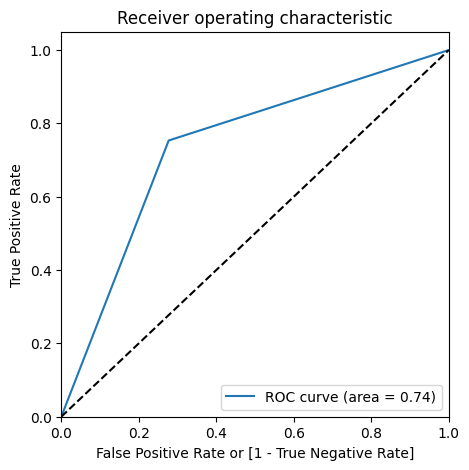

0.7380808489744011

In [197]:
# Call the ROC function
draw_roc(y_train_pred_final['Stayed'], y_train_pred_final['Predicted'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [198]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Stayed_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Stayed,Stayed_Probability,Employee ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,True,0.377470,1516,0,1,1,1,1,0,0,0,0,0,0
1,True,0.943345,3352,1,1,1,1,1,1,1,1,1,1,1
2,False,0.767937,59196,1,1,1,1,1,1,1,1,1,0,0
3,False,0.436563,71453,0,1,1,1,1,1,0,0,0,0,0
4,False,0.802680,68890,1,1,1,1,1,1,1,1,1,1,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [199]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.521418     1.000000     0.000000
0.1          0.1  0.587392     0.994686     0.143642
0.2          0.2  0.659352     0.961289     0.330389
0.3          0.3  0.703968     0.909623     0.479905
0.4          0.4  0.731312     0.839455     0.613489
0.5          0.5  0.738735     0.753345     0.722816
0.6          0.6  0.729209     0.644467     0.821536
0.7          0.7  0.704939     0.527714     0.898026
0.8          0.8  0.660464     0.387689     0.957655
0.9          0.9  0.587614     0.215973     0.992520


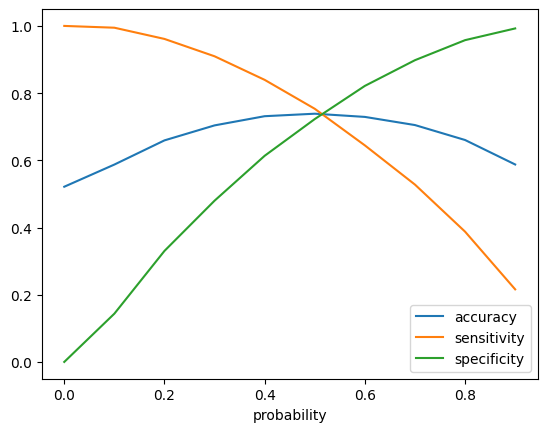

In [200]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [201]:
# Create a column for final prediction based on the optimal cutoff
#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Stayed_Probability.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Stayed,Stayed_Probability,Employee ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,True,0.377470,1516,0,1,1,1,1,0,0,0,0,0,0,0
1,True,0.943345,3352,1,1,1,1,1,1,1,1,1,1,1,1
2,False,0.767937,59196,1,1,1,1,1,1,1,1,1,0,0,1
3,False,0.436563,71453,0,1,1,1,1,1,0,0,0,0,0,0
4,False,0.802680,68890,1,1,1,1,1,1,1,1,1,1,0,1


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [202]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Stayed, y_train_pred_final.final_predicted)
print("Accuracy", round(accuracy, 4))

Accuracy 0.7387


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

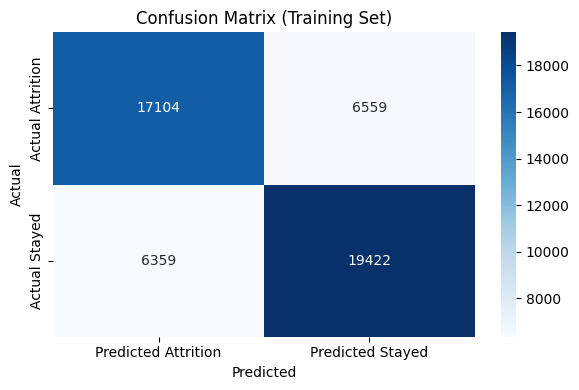

In [203]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Stayed, y_train_pred_final.final_predicted )
plt.figure(figsize=(6,4))
sns.heatmap(confusion2, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Attrition", "Predicted Stayed"],
            yticklabels=["Actual Attrition", "Actual Stayed"])

plt.title("Confusion Matrix (Training Set)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [204]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [205]:
# Calculate Sensitivity
sensitivity = TP / (TP + FN)
print("Sensitivity:", round(sensitivity, 4))

Sensitivity: 0.7533


In [206]:
# Calculate Specificity
specificity = TN / (TN + FP)
print("Specificity:", round(specificity, 4))

Specificity: 0.7228


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [207]:
# Calculate Precision
precision = TP / (TP + FP)
print("Precision:", round(precision, 4))

Precision: 0.7475


In [208]:
# Calculate Recall
recall = TP / (TP + FN)
print("Recall:", round(recall, 4))

Recall: 0.7533


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [209]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [210]:
# Check actual and predicted values from initial model
y_train_pred_final[['Employee ID', 'Stayed', 'Stayed_Probability', 'Predicted']].head()

,Employee ID,Stayed,Stayed_Probability,Predicted
0,1516,True,0.377470,0
1,3352,True,0.943345,1
2,59196,False,0.767937,1
3,71453,False,0.436563,0
4,68890,False,0.802680,1


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

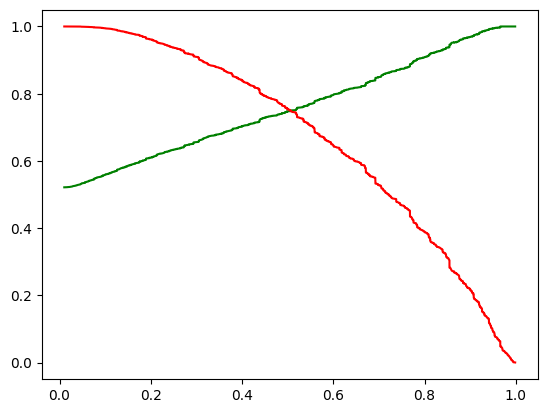

In [211]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Stayed, y_train_pred_final.Stayed_Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [212]:
# Select the relevant features for validation set
feature_cols = X_Train.columns

#Select features from validation set
X_validation = X_Test[feature_cols]


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [213]:
# Add constant to X_validation
X_validation = X_validation.copy()
for col in X_validation.select_dtypes(include='bool').columns:
    X_validation[col] = X_validation[col].astype(int)

X_validation = X_validation.apply(pd.to_numeric, errors='coerce')
X_validation = sm.add_constant(X_validation)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [214]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(X_validation)


# View predictions
y_validation_pred


38726    0.907654
24574    0.940935
21775    0.237373
42700    0.569507
60433    0.126088
           ...   
36016    0.364541
12693    0.425752
61993    0.578834
21944    0.603701
66364    0.975501
Length: 21191, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [215]:
# Convert predictions to DataFrame
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted'])

# Convert actual values to DataFrame
actual = pd.DataFrame(Y_Test, columns=['Stayed'])
actual.columns = ['Actual']

# Reset index (remove index alignment)
predicted_probability = predicted_probability.reset_index(drop=True)
actual = actual.reset_index(drop=True)

# Append side by side
validation_results = pd.concat([actual, predicted_probability], axis=1)

# View results
validation_results.head()

,Actual,Predicted
0,True,0.907654
1,True,0.940935
2,True,0.237373
3,True,0.569507
4,False,0.126088


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [216]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
optimal_cutoff = 0.5

validation_results['final_prediction'] = (validation_results['Predicted'] >= optimal_cutoff).astype(int)

# Check the DataFrame
validation_results.head()

,Actual,Predicted,final_prediction
0,True,0.907654,1
1,True,0.940935,1
2,True,0.237373,0
3,True,0.569507,1
4,False,0.126088,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [217]:
# Calculate the overall accuracy
accuracy = accuracy = metrics.accuracy_score(validation_results['Actual'], validation_results['final_prediction'])
print("Overall Accuracy:", round(accuracy,4))

Overall Accuracy: 0.7357


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

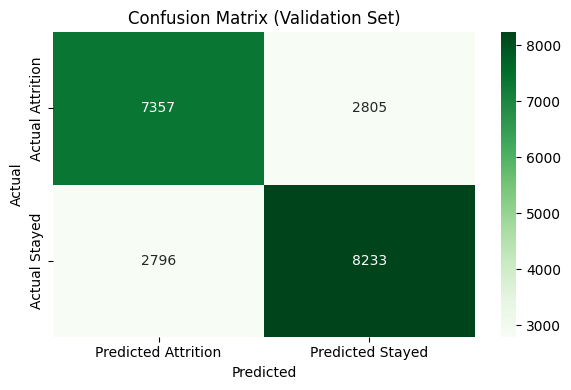

In [218]:
# Create confusion matrix
confusion3 = metrics.confusion_matrix(
    validation_results.Actual, 
    validation_results.final_prediction
)

# Create heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion3, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Predicted Attrition", "Predicted Stayed"],
            yticklabels=["Actual Attrition", "Actual Stayed"])

plt.title("Confusion Matrix (Validation Set)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


In [219]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion3.ravel()
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 7357
False Positive: 2805
False Negative: 2796
True Positive: 8233


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [220]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity (Recall):", sensitivity)


Sensitivity (Recall): 0.7464865354973252


In [221]:
# Calculate specificity
specificity = tn / (tn + fp)

print("Specificity (True Negative Rate):", round(specificity,4))

Specificity (True Negative Rate): 0.724


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [222]:
# Calculate precision
precision = tp / (tp + fp)
print("Precision:", round(precision,4))

Precision: 0.7459


In [223]:
# Calculate recall
recall = tp / (tp + fn)
print("Recall:", round(recall,4))

Recall: 0.7465


In [224]:
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Overall Accuracy: 0.7357
Sensitivity (Recall): 0.7465
Specificity: 0.7240
Precision: 0.7459
Recall: 0.7465


## Conclusion
The logistic regression model demonstrates balanced performance, with an overall accuracy of 73.5%. Sensitivity of 74.6% shows that the model is effective at identifying true positives, while specificity of 72.0% indicates it also correctly classifies negatives at a reasonable level. Precision of 74.7% confirms that positive predictions are generally reliable. Together, these metrics suggest that the model is moderately effective and well‑calibrated, offering a good trade‑off between false positives and false negatives. While there is scope for improvement through further tuning or alternative algorithms, the current model provides a solid foundation for predicting employee attrition and can be confidently used for practical decision‑making.

